In [330]:
from IPython.display import display
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import IGate, XGate, CXGate, HGate
from qiskit.quantum_info import Statevector, Operator

from qiskit_aer import AerSimulator

sim = AerSimulator()

def run_sim(c):
    return sim.run(c, shots=1, memory=True).result().get_memory()

def to_string(v):
    o = v.draw('latex_source').strip()
    o = o.replace('\\rangle', '>')
    return o

Sources:

* Mostly, IBM courses, https://learning.quantum-computing.ibm.com/
* Also from this MIT lecture https://www.youtube.com/watch?v=awpnsGl08bc

# Basics

A qubit has two possible states $\ket{0}$ or $\ket{1}$, but we can also have a superposition of those states.

If we define these pure states to have the forms:

$$
\ket{0} = \begin{pmatrix}  1 \\ 0 \end{pmatrix}
$$

and

$$
\ket{1} = \begin{pmatrix}  0 \\ 1 \end{pmatrix}
$$

We can represent any superposition of those states with a column matrix e.g.

$$
\psi = \begin{pmatrix}  a \\ b \end{pmatrix}
$$

Where $a$ and $b$ are some complex coefficients. And they follow the square normalizability constraints from QM.

This also means that any more general state can also be expressed by:

$$
\psi = a \ket{0} + b \ket{1}
$$



In [331]:
one = Statevector([0, 1])
zero = Statevector([1, 0])

display(one.draw('latex'))
display(zero.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Generally, we work not with single qubits, but with multiple qubits.

Therefore, we need a compact way of describing these combinations.

If we have two qubits, there are 4 possible combinations:

$$
\begin{matrix} \ket{00} & \ket{01} \\ \ket{10} & \ket{11} \end{matrix}
$$

Where $\ket{10}$, means the first bit is in state $\ket{0}$ and the second state $\ket{1}$.

When we come to measure our system, because we only ever get pure states out, we know we'll get one of these combinations, with some probability.

Similarly to the above, we can create a _tensor_ (not a matrix!, they don't follow the same rules!) that represents these combinations:

$$
\begin{matrix} \ket{00} \\ \ket{01} \\ \ket{10} \\ \ket{11} \end{matrix} \begin{pmatrix} \alpha \\ \beta \\ \gamma \\ \delta \end{pmatrix}
$$

Where the square magnitude of these values gives the probability of getting a given state.

As described above, the state of one qubit can be expressed by a 2x1 matrix.

Provided qubits 1 and 2 are independent from one another, the probability of getting a given combination of qubits, is just the product of their probabilities... although actually we do this for the coefficients, so I don't quite know the deal here...

But in essence, this means we can build this tensor of possibilities by the _catesian product_ of the individual states that make it up. e.g. $\ket{00}$ is the product of the values is the matrix for the $0$ of qubit 1 and $0$ of qubit 2.

This operation can be written in a few ways, $\ket{\alpha} \otimes \ket{\beta}$, or $\ket{\alpha}\ket{\beta}$ for short and this means build up that vector... or is a tensor... I no longer know...

In [54]:
display((one ^ zero).draw('latex')) ## ^ means do the tensor product

<IPython.core.display.Latex object>

Interestingly, it's possible for us to end up with a state vector that cannot be split into a cartesian product. For example:

$$
\begin{pmatrix} \frac{1}{\sqrt{2}} \\ 0 \\ 0 \\ \frac{1}{\sqrt{2}} \end{pmatrix}
$$

... which is interesting.

Given that the way to got to this cartesian product idea was by saying these values are calcualted on the basis the two qubits are independent, the fact that we can 
no longer do this suggests the values of the qubits now depend on one another. This suggests some sort of correlation or _entanglement_ between the qubits!

E.g. the above is an entangled state.

In our quantum circuit we have pure states as inputs and outputs and there's a very nice notation to draw these:

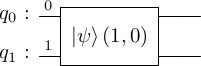

In [483]:
c = QuantumCircuit(2)
c.initialize('10')
c.draw('latex')

What's a bit confusing to me, is that by convention, if we were to split this into a tensor product we would write it as $ \ket{q_1} \otimes \ket{q_0} $
Which means that $\ket{10}$ means a zero on the top bit and a one on the bottom... which maybe makes sense because 517, the 7 is the least significant digit, so would maybe have the lowest 'index' or whatever.

The above is a very boring quantum circuit, so we need it do things.

The degree of freedom we have are the state vectors of the bits, so we want operators that act on these state vectors.

Because normalisability must be maintained, these operators must be unitary, i.e. they should not screw this up!

There are a bunch of classic unitary operatators

In [55]:
X = Operator([[0, 1], [1, 0]]) # not
Y = Operator([[0, -1.0j], [1.0j, 0]]) 
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / np.sqrt(2), 1 / np.sqrt(2)], [1 / np.sqrt(2), -1 / np.sqrt(2)]]) # hadamard
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / np.sqrt(2)]])
I = Operator(np.eye(2))

These have a matrix representation e.g. Hadamard:

$$
\frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}
$$

Applying the gate to a qubit is as simple as performing matrix multiplication:

$$
H \ket{0} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \pmatrix{\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}} = \ket{+}
$$

So $\ket{+}$ is shorthand for:

$$
\ket{+} = \pmatrix{\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}} = H \ket{0}
$$

Similarly:

$$
H \ket{1} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \pmatrix{\frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}}} = \ket{-}
$$

so:

$$
\ket{-} = \pmatrix{\frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}}} = H \ket{1}
$$

And there are a bunch of these identities etc.

They all have the fun property that:

$$
U_f U_f^{-1} = \mathbb{I}
$$

Which in turn somehow guarantees that they don't screw up probability vectors:

In [530]:
M = Operator(np.array([[1, 1],
                       [0, 0]]))

for name, U in zip('XYZHSTIM', [X, Y, Z, H, S, T, I, M]):
    print(name)
    try:
        print('is unitary', np.all(np.isclose(U @ U.power(-1), np.eye(2))))
    except Exception:
        print('is unitary', False)
    V = np.random.random((2, 1))
    V = V / abs(V * V).sum()
    print(abs(V * V).sum())
    
    O = np.array(U @ V)
    
    print(np.array(abs(O * O)).sum())

X
is unitary True
0.8681827603171397
0.8681827603171397
Y
is unitary True
1.0713346726373254
1.0713346726373254
Z
is unitary True
1.007342771509296
1.007342771509296
H
is unitary True
2.3307491533405273
2.330749153340527
S
is unitary True
1.2031765465961133
1.2031765465961133
T
is unitary True
1.0725561101947068
1.0725561101947068
I
is unitary True
1.1305245653409801
1.1305245653409801
M
is unitary False
1.64397967522694
3.287897870460094


In our quantum circuit, we apply these gates:

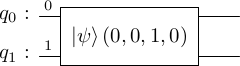

In [51]:
c.draw('latex')

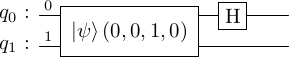

In [53]:
c.h(0) # do a Hadamard on qubit 0
c.draw('latex')

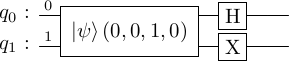

In [58]:
c.x(1) # do a Hadamard on qubit 0
c.draw('latex')

We could slightly laboriously perform the matrix multiplication of these operations on each state and then remake our state vector for the whole system.

However, somehow... performing a hadamard (H) on bit zero and then a not (X) on bit 1, is equivalent to

$$
H \otimes X
$$

Where $H \otimes X$ is tensor products of a matrix, which is this mental thing where you mutliply the second matrix by the value in each cell of the first, and then kinda tile that matrix at that position in the new matrix.

In [70]:
# see!
(one.evolve(H) ^ zero.evolve(X)) == (one ^ zero).evolve(H ^ X)

True

Although in the above form maybe this makes some sense... which is essentially:

$$
H \ket{1} \otimes X \ket{0} = (H \otimes X) (\ket{1} \otimes \ket{0})
$$

# Trying to do something useful!

## The Deutsch problem

Imagine we have a function is described by $f: \{ 0, 1\} \to \{0, 1\}$

This means the input is a binary digit and returns an output that is a binary digit $0$ or $1$.

The function can be 'constant' or 'balanced'.

Constant: the output will _always_ return 1 or _always_ 0.

Balanced: the output will be 1 for half of inputs and 0 for the other half.

## A Classical Algorithm

So we want to solve this problem using some classical electronic circuitry that implements boolean algebra... and there's a way!

If we draw out the 4 possible version of the function $f$:

| $a$   | $f_1 (a)$   | $f_2 (a)$   | $f_3 (a)$   | $f_4 (a)$   |
|-------|-------------|-------------|-------------|-------------|
|  0    |        0    |      0      |      1      |     1       |
|  1    |        0    |      1      |      0      |     1       |
| Deutsch(f) | constant | balanced | balanced | constant | 
| $f(0) \oplus f(1)$ |  0   |  1      |     1   |    0   |   

So we can see that $f_1$ and $f_4$ are contant and $f_2$ and $f_3$ are balanced. Furthermore! We can see that XORing the two outputs of the functions results in a zero if the function was constant and a 1 if it was balanced.

Therefore! To implement a logical circuit to solve this problem, we just would need to create a circuit that queries $f(0)$ and $f(1)$ and then takes $f(0) \oplus f(1)$ to tell us if $f$ was balanced or constant.

So this tells us, XORing the output from $f(0)$ and $f(1)$ is a way of solving this problem.

# Doing this in a quantum computer

## The 'obvious' way.

Implementing the algorithm above on a quantum computer takes a bit of thought. Firstly, we need to run the function $f$ on different inputs. For example for $f_1$, whether it sees a $0$ or a $1$, it always turns this into a $0$. An obvious first step would be to try and come up with an operator that does this, such as:

$$
M = \begin{pmatrix} 1 & 1 \\ 0 & 0 \end{pmatrix} \text{ thus } M \ket{0} = \ket{0} \text{ and } M \ket{1} = \ket{0}
$$

But this matrix is not unitary! 

$$
M M^{-1} = \begin{pmatrix} 1 & 1 \\ 0 & 0 \end{pmatrix} \begin{pmatrix} 0 & 0 \\ 1 & 1 \end{pmatrix} = \begin{pmatrix} 1 & 1 \\ 0 & 0 \end{pmatrix} = M \neq \mathbb{I}
$$


So we can't use it as an operator (as I understand it!). So we need a way of applying $f$ in a way that is unitary.

Turns out the way to do this is using a query architecture, in which we construct a unitary operator $U_f$, such that:

$$
U_f \ket{x} \ket{y} = \ket{x} \ket{y \oplus f(x)}
$$

So what this means is, we have some input $\ket{x}$, which goes into $U_f$, and passes through. But $U_f$ also calculates $f(x)$ and XORs the output with $\ket{y}$. Because all that $y \oplus f(x)$ is doing is flipping $\ket{y}$ between $\ket{0}$ or $\ket{1}$, this operation is always unitary! Smart!

The next natural question may be, how do we actually perform this operation in a quantum computer.

The answer is the NOT operator, which for 2 bits, looks like:

$$
\text{CNOT} = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}
$$

If we imagine how this acts on a generic state vector:

$$
\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix} \begin{pmatrix} \ket{00} \\ \ket{01} \\ \ket{10} \\ \ket{11} \end{pmatrix} = \begin{pmatrix} \ket{00} \\ \ket{01} \\  \ket{11} \\ \ket{10} \end{pmatrix}
$$

If we draw up a table of the mapping of states:

| in       |    out   |
|----------|----------|
| $\ket{00}$ | $\ket{00}$ |
| $\ket{01}$ | $\ket{01}$ |
| $\ket{10}$ | $\ket{11}$ |
| $\ket{11}$ | $\ket{10}$ |

If we just examine the second bit, i.e. the first digit! and draw that up:

|   first / second    |    0   |  1 |
|----------|--------|----|
|    0     |    0   |  1 |
|    1     |     1  | 0  |

OMG this is just the truth table for an XOR gate _and_ the second digit is preserved, so this perfectly implements the query model we wanted... hooray!


In [336]:
from itertools import product

CNOT = Operator([[1, 0, 0, 0], 
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])

for a, b in product([zero, one], [zero, one]):
    print(to_string(a ^ b), to_string(((a ^ b).evolve(CNOT))))

|00> |00>
|01> |01>
|10> |11>
|11> |10>


With this info, we can try out our different $f$'s and create a quantum implementation of the circuit described above.

Looking at the table of the different possible $f$s:

| $a$   | $f_1 (a)$   | $f_2 (a)$   | $f_3 (a)$   | $f_4 (a)$   |
|-------|-------------|-------------|-------------|-------------|
|  0    |        0    |      0      |      1      |     1       |
|  1    |        0    |      1      |      0      |     1       |


And considering our query gate implementation $U_f \ket{x} \ket{y} = \ket{x} \ket{y \oplus f(x)}$.

In the $f_1$ case, no matter what we put into $f_1$, we always get $0$, thus we can write this as:

$U_f \ket{x} \ket{y} = \ket{x} \ket{y \oplus 0} = \ket{x} \ket{y}$.

So the $f_1$ case, we actually don't have to do anything.

For the $f_2$, $f(a) \to a$, so $f(x) = x$ so:

$U_f \ket{x} \ket{y} = \ket{x} \ket{y \oplus x}$.

For $f_3$, $f(a) \to ¬ a$, thus:

$U_f \ket{x} \ket{y} = \ket{x} \ket{y \oplus ¬ x} = \ket{x} \ket{¬y \oplus x}$.

and $f_4$ $f(a) \to 1$, giving:

$U_f \ket{x} \ket{y} = \ket{x} \ket{y \oplus 1} = \ket{x} \ket{¬y}$.

So we can implement each of these possibilties:

f 1


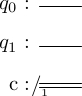

f 2


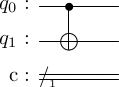

f 3


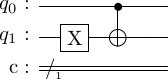

f 4


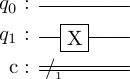

In [476]:
def make_circuit(f, initial=None):
    c = QuantumCircuit(2, 1)

    if initial:
        c.initialize(initial)
        c.barrier()
        
    if f == 1:
        pass
    elif f == 2:
        c.cx(0, 1)
    elif f == 3:
        c.x(1)
        c.cx(0, 1)
    elif f == 4:
        c.x(1)    

    return c

for f in [1, 2, 3, 4]:
    print("f", f)
    c = make_circuit(f)
    
    display(c.draw('latex'))


Then to extract the value of $f(x)$, we need to perform $\ket{y} \oplus \ket{y \oplus f(x)}$.

But if we just set $\ket{y} = \ket{0}$, then $\ket{0} \oplus \ket{0 \oplus f(x)} = \ket{f(x)}$.

Then we just measure $\ket{y}$ to get the outcome of $f(x)$.

E.g. for $f_4$ of $x = 0$ and $x = 1$:

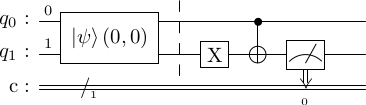

f_3(0) = 1


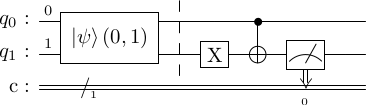

f_3(1) = 0


In [477]:
f = 3

for x in [0, 1]:
    #c = QuantumCircuit(2, 1)

    c = make_circuit(3, initial=f'0{x}')

    c.measure(1, 0)
    
    display(c.draw('latex'))

    out = run_sim(c)[0]

    print(f'f_{f}({x}) = {out}')

It works!

Then to solve Deutsch's problem for the different $f$s we can do:

Testing f_1


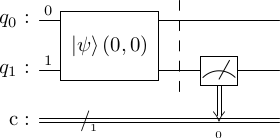

f_1(0) = 0


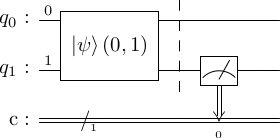

f_1(1) = 0
f_1 is constant
Testing f_2


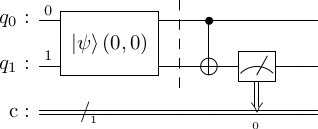

f_2(0) = 0


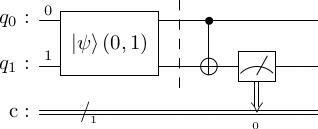

f_2(1) = 1
f_2 is balanced
Testing f_3


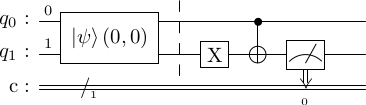

f_3(0) = 1


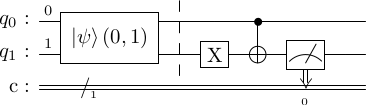

f_3(1) = 0
f_3 is balanced
Testing f_4


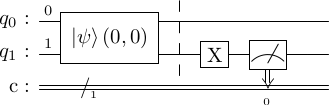

f_4(0) = 1


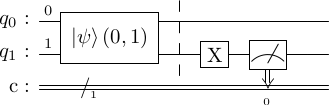

f_4(1) = 1
f_4 is constant


In [478]:
for f in [1, 2, 3, 4]:
    print(f"Testing f_{f}")
    
    outputs = []
    for x in [0, 1]:
        c = make_circuit(f, initial=f'0{x}')
        
        c.measure(1, 0)
        
        display(c.draw('latex'))
    
        out = int(run_sim(c)[0])
    
        print(f'f_{f}({x}) = {out}')

        outputs.append(out)
    
    if sum(outputs) % 2: # XOR the bits
        print(f"f_{f} is balanced")
    else:
        print(f"f_{f} is constant")

Woohoo, so this algorithm can solve this problem - happy days!

The thing is here, this algorithm is doing exactly the same thing as the classical algorithm. It's evaluting $f(0)$ and $f(1)$ and then XORing the outputs.

In essence this requires evaluating $f$ twice, which is just as many times as the classical algorithm and therefore has no advantage, plus requires building a massively complicated instrument...

However! There is some magical way to get this down to one evaluation...

In the approach above, we only ever put in pure states into $U_f$.

However, because $U_f$ is implemented using quantum gates, namely just X and CNOT gates, these operations can work on quantum states.

This dude Deutsch had this crazy idea that rather than inputing $0$ and $1$ into the circuit. We set the circuit up to have the form:

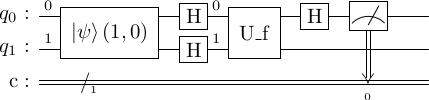

In [479]:
c = QuantumCircuit(2, 1)

c.initialize('10')

c.h(0)
c.h(1)

fm = Operator(np.eye(4)).to_instruction()
fm.label = 'U_f'
c.append(fm, [0, 1])

c.h(0)

c.measure(0, 0)

c.draw('latex')

Here you might notice that we are no longer meauring the result of $\ket{y \oplus f(x)}$ which seems completely bonkers to me...

Also not that here, the input states are quite carefully prepared. We _must_ be inputting $\ket{x} = \ket{+}$ and $\ket{y} = \ket{-}$ into $U_f$. (Note that $H\ket{0} = \ket{+}$ and $H \ket{1} = \ket{-}$).

Without proving it, we will find that if $\ket{x} = 1$, the $f$ is balanced and if $\ket{x} = 0$, $f$ is constant.

So let's try it!

Testing f_1


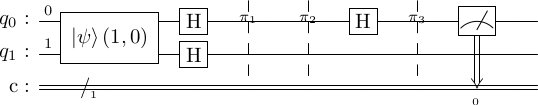

f_1 is constant
Testing f_2


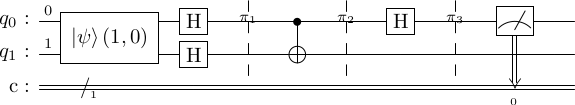

f_2 is balanced
Testing f_3


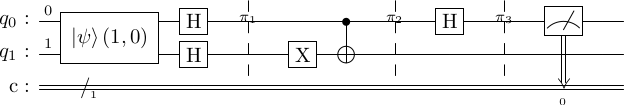

f_3 is balanced
Testing f_4


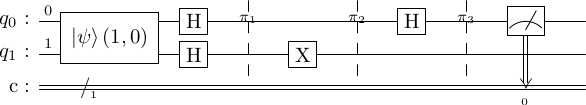

f_4 is constant


In [482]:
for f in [1, 2, 3, 4]:
    print(f"Testing f_{f}")
    c = QuantumCircuit(2, 1)

    
    c.initialize('10')
    
    c.h(0)
    c.h(1)

    c.barrier(label='\\pi_1')

    U_f = make_circuit(f, initial=None)

    c = c.compose(U_f)
            
    c.barrier(label='\\pi_2')

    c.h(0)

    c.barrier(label='\\pi_3')

    c.measure(0, 0)
    
    display(c.draw('latex'))

    out = run_sim(c)

    print(f'f_{f} is constant' if out[0] == '0' else f'f_{f} is balanced')

Lo and behold, despite the very strange measuring scheme, we are getting the desired output!

Furthermore, notice, in this scheme, we only need to run the circuit once, but still determining if $f$ is blanced or constant. So this is literally twice as fast a boolean approach! 🤯

___

This makes very little sense to me. So let's dig into the maths to work out how tf this worked.

We started with $\ket{1}$ and $\ket{0}$, and then $H \ket{1} = \ket{-}$ and $H \ket{0} = \ket{+}$. So the input to $U_f$, which we'll call $\pi_1$ can be written as:

$$
\pi_1 = \ket{-} \ket{+} = \frac{1}{2}(\ket{0} - \ket{1}) \ket{0} + \frac{1}{2}(\ket{0} - \ket{1}) \ket{1}
$$

I find it helpful to go rogue on the notation and write this as:

$$
\pi_1 = \ket{y} \ket{x} = \frac{1}{2}(\ket{y = 0} - \ket{y = 1}) \ket{x = 0} + \frac{1}{2}(\ket{y = 0} - \ket{y = 0}) \ket{x = 1}
$$

So going ahead and looking at $\pi_2 = U_f \pi_1$:

$$
U_f \pi_1 = \pi_2 = \frac{1}{2}(\ket{y = 0 \oplus f(x = 0)} - \ket{y = 1 \oplus f(x = 0)}) \ket{0} + \frac{1}{2}(\ket{y = 0 \oplus f(x = 1)} - \ket{y = 1 \oplus f(x = 1)}) \ket{1}
$$

Or more conventionally:

$$
U_f \pi_1 = \pi_2 = \frac{1}{2}(\ket{0 \oplus f(0)} - \ket{1 \oplus f(0)}) \ket{0} + \frac{1}{2}(\ket{0 \oplus f(1)} - \ket{1 \oplus f(1)}) \ket{1}
$$

Using the identity:

$$
\ket{0 \oplus a} - \ket{1 \oplus a} = (-1)^a (\ket{0} - \ket{1})
$$

We can simplify the above to:

$$
\pi_2 = \frac{1}{2}(-1)^{f(0)} (\ket{0} - \ket{1}) \ket{0} + \frac{1}{2}(-1)^{f(1)}(\ket{0} - \ket{1}) \ket{1}
$$

Which can be expressed as:

$$
\pi_2 = \ket{-} \left( \frac{(-1)^{f(0)} \ket{0} + (-1)^{f(1)} \ket{1}}{\sqrt{2}} \right)
$$

Then 

$$
\pi_2 = (-1)^{f(0)} \ket{-} \left( \frac{\ket{0} + (-1)^{f(0) \oplus f(1)} \ket{1}}{\sqrt{2}} \right)
$$

In the case that $f(0) \oplus f(1) = 0$, this then gives us:

$$
\pi_2 = (-1)^{f(0)} \ket{-}\ket{+}
$$

And that $f(0) \oplus f(1) = 1$:

$$
\pi_2 = (-1)^{f(0)} \ket{-}\ket{-}
$$

Then we do our final Hadamard gate on $x$, which turns $H \ket{-} = 1$ and $H \ket{+} = 0$.

So when $f(0) \oplus f(1) = 0$ i.e. the function is constant, $x = 0$ and when $f(0) \oplus f(1) = 1$, $x = 1$.

As an aside, here is a different quantum implementation of the classical algorithm,

So we are essentially trying the input on bit separately.

Looking up the table for $f$, I can work out how f transforms each bit and then perform a CNOT operation to find the XOR of these outputs and determine if $f$ is balanced or constant... it works! 

The problem with this implmentation is we can only work out the required operators based on the values of $\ket{x}$ and $\ket{y}$... in a sense we have a different $U_f$ for each one. This means this implementation certainly won't work on a superposition of states, where it's uncertain which state the input is in!

f1


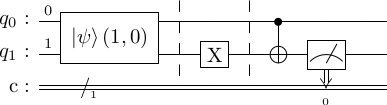

constant
f2


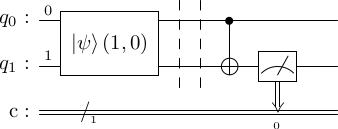

balanced
f3


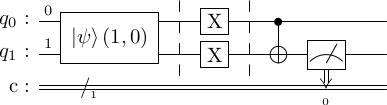

balanced
f4


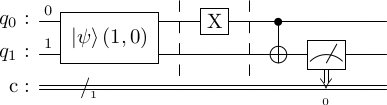

constant


In [458]:
for f in [1, 2, 3, 4]:
    print(f"f{f}")
    c = QuantumCircuit(2, 1)
    c.initialize('10')
    
    c.barrier()
    
    if f == 1:
        c.x(1)
    elif f == 2:
        pass
    elif f == 3:
        c.x(0)
        c.x(1)
    elif f == 4:
        c.x(0)
    
    c.barrier()
    
    c.cx(0, 1)
    
    c.measure(1, 0)
    
    display(c.draw('latex'))

    out = run_sim(c)

    print('constant' if out[0] == '0' else 'balanced')